# Normalizing Flows

Working through some examples after Nicole H's great tutorial

In [1]:
import jax.numpy as jnp
import jax.random as jr
from flowjax.flows import MaskedAutoregressiveFlow
from flowjax.train import fit_to_data
from flowjax.distributions import Normal
from flowjax.bijections import RationalQuadraticSpline
import matplotlib.pyplot as plt
from flowjax.tasks import two_moons

Generate the "2 moon" sample:

In [2]:
n_samples = 10000
rng = jr.PRNGKey(0)
x = two_moons(rng, n_samples)
x = (x - x.mean(axis=0))/x.std(axis=0) # Standardize

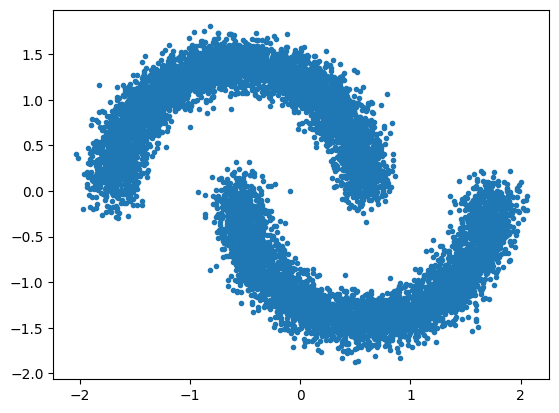

In [6]:
plt.figure()
plt.scatter(x=x[:,0], y=x[:,1], marker='.')
plt.show()

Create the flow:

In [10]:
key, subkey = jr.split(jr.PRNGKey(0))
base_dist = Normal(jnp.zeros(x.shape[1]))
flow = MaskedAutoregressiveFlow(
    subkey,
    base_dist,
    RationalQuadraticSpline(knots=16, interval=4),
)

Do the training:

In [13]:
key, subkey = jr.split(key)
flow, losses = fit_to_data(subkey, flow, x, learning_rate=5e-4)

  0%|          | 0/50 [00:00<?, ?it/s]

 28%|██▊       | 14/50 [00:27<01:10,  1.97s/it, train=1.53, val=1.5 (Max patience reached)]


And sample the resulting flow:

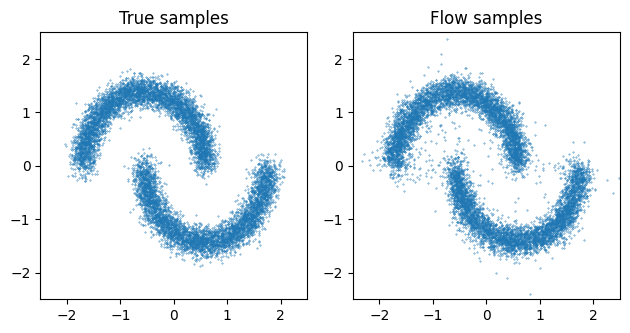

In [14]:
key, subkey = jr.split(key)
x_samples = flow.sample(subkey, (n_samples,))

fig, axs = plt.subplots(ncols=2)

axs[0].scatter(x[:, 0], x[:, 1], s=0.1)
axs[0].set_title("True samples")

axs[1].scatter(x_samples[:, 0], x_samples[:, 1], s=0.1)
axs[1].set_title("Flow samples")

lims = (-2.5, 2.5)
for ax in axs:
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()